#### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
import os

In [2]:
os.chdir("E:\DOWNLOADS FILE")

### Analysing the IBM stock price by using stacked LSTM.

## DATA PRE-PROCESSING

####  First , Import the  dataset

In [3]:
data = pd.read_csv("ibm_train.csv")
data

,Date,High,Open,Low,Close,Volume
0,03-01-2006,41.22,39.69,38.79,40.91,24232729
1,04-01-2006,41.90,41.22,40.77,40.97,20553479
2,05-01-2006,41.73,40.93,40.85,41.53,12829610
3,06-01-2006,43.57,42.88,42.80,43.21,29422828
4,09-01-2006,43.66,43.10,42.82,43.42,16268338
...,...,...,...,...,...,...
3265,22-12-2017,71.87,71.42,71.22,71.58,10979165
3266,26-12-2017,71.39,70.94,69.63,69.86,8542802
3267,27-12-2017,70.49,69.77,69.69,70.06,6345124
3268,28-12-2017,70.32,70.12,69.51,69.82,7556877


#### We have chosen 'High' attribute for prices. 
     -- set index for high column

In [4]:
df = data.reset_index()["High"]                   
df

0       41.22
1       41.90
2       41.73
3       43.57
4       43.66
        ...  
3265    71.87
3266    71.39
3267    70.49
3268    70.32
3269    70.13
Name: High, Length: 3270, dtype: float64

### Feature Scaling

##### Why Feature Scaling?
       - normalise the data, because range of data varies widely
      

In [5]:
sc = MinMaxScaler(feature_range=(0,1))        

In [6]:
df = sc.fit_transform(np.array(df).reshape(-1,1))

### split the data into train and test

In [7]:
training_size = int(len(df)*0.80)
test_size= len(df)-training_size

In [8]:
train , test = df[0:training_size,:],df[training_size:len(df),:]

#### Since LSTMs store long term memory state, we create a data structure with 100 timesteps and 1 output
### So for each element of training set, we have 100 previous training set elements 

In [9]:
def create_dataset(dataset,time_Step=1):
    x =[]
    y =[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i+time_step,0])
    return np.array(x),np.array(y)

In [10]:
# reshape into x=t , t+1,t+2,t+3 and Y =t+4

time_step=100
x_train , y_train = create_dataset(train,time_step)
x_test , y_test = create_dataset(test,time_step)


In [11]:
x_train.shape

(2024, 100)

### Reshaping the array
      -inputs: A 3D array, with shape [batch, timesteps, feature]. according to keras documentation

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

### Building the model

In [14]:
### Initialising the RNN
regressor = Sequential()

In [15]:
# Adding the first LSTM layer and some dropuot regularisation
regressor.add(LSTM(units=50,return_sequences = True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [16]:
# Adding the second LSTM layer and some dropuot regularisation
regressor.add(LSTM(units=50,return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Adding the third LSTM layer and some dropuot regularisation
regressor.add(LSTM(units=50,return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
# # Adding the fourth LSTM layer and some dropuot regularisation
regressor.add(LSTM(units=70))
regressor.add(Dropout(0.2))

In [19]:
# Adding the output layer
regressor.add(Dense(units=1))

In [20]:
# Compiling the RNN
regressor.compile(optimizer="adam",loss ="mean_squared_error")

In [21]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 70)                3

In [22]:
# Compiling the RNN
regressor.compile(optimizer="adam",loss ="mean_squared_error")
# Fitting the RNN to training set
regressor.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32)

Train on 2024 samples, validate on 1044 samples
Epoch 1/100
2024/2024 [==============================] - 44s 22ms/sample - loss: 0.0039 - val_loss: 0.0056
Epoch 2/100
2024/2024 [==============================] - 28s 14ms/sample - loss: 0.0012 - val_loss: 0.0049
Epoch 3/100
2024/2024 [==============================] - 27s 13ms/sample - loss: 9.7637e-04 - val_loss: 0.0055
Epoch 4/100
2024/2024 [==============================] - 27s 13ms/sample - loss: 9.1576e-04 - val_loss: 0.0045
Epoch 5/100
2024/2024 [==============================] - 26s 13ms/sample - loss: 8.5918e-04 - val_loss: 0.0026
Epoch 6/100
2024/2024 [==============================] - 27s 13ms/sample - loss: 8.8773e-04 - val_loss: 0.0023
Epoch 7/100
2024/2024 [==============================] - 26s 13ms/sample - loss: 7.8214e-04 - val_loss: 0.0037
Epoch 8/100
2024/2024 [==============================] - 26s 13ms/sample - loss: 8.5234e-04 - val_loss: 0.0036
Epoch 9/100
2024/2024 [==============================] - 27s 13ms/sample

### Predicting future stock price by using test and train dataset


In [23]:
# lets do prediction

train_predict = regressor.predict(x_train)
test_predict = regressor.predict(x_test)

In [24]:
# transforms to original form
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

In [25]:
# calculate RMSE performance metric
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

22.467947662306873

In [26]:
# test data
math.sqrt(mean_squared_error(y_test,test_predict))

45.860387457770855

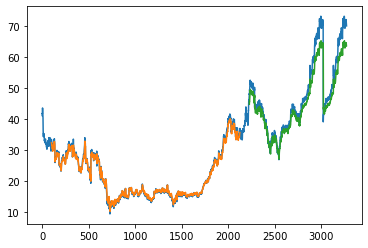

In [27]:
# plotiing
# train prediction
look_back=100
trainpredictplot =np.empty_like(df)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:] = train_predict
# test prediction
testpredictplot = np.empty_like(df)
testpredictplot[:,:] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df)-1,:] = test_predict

# plot baseline and predictions
plt.plot(sc.inverse_transform(df))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)                                     # yellow line - train_predict
plt.show()                                                    # green line - test_predict
                                                             # blue line- realdata

# Predict the future 30 days and plot it

In [28]:
len(test) - 100

1045

In [29]:
x_input = test[1045:].reshape(1,-1)

In [30]:
x_input.shape

(1, 100)

In [31]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [32]:
temp_input

[0.791437980241493,
 0.7845381840991063,
 0.7644660498667085,
 0.7768543202132666,
 0.7944174376666145,
 0.8055511996236476,
 0.8464795358318961,
 0.8502430610004706,
 0.8549474674611888,
 0.8787831268621609,
 0.88631017719931,
 0.8894464481731224,
 0.8794103810569234,
 0.861690450054885,
 0.8505566880978518,
 0.8640426532852439,
 0.866865297161675,
 0.8609063823114318,
 0.859651873921907,
 0.8593382468245259,
 0.8577701113376197,
 0.8602791281166695,
 0.8747059745962054,
 0.8805080758977577,
 0.8974439391563431,
 0.9004233965814648,
 0.8966598714128902,
 0.9063823114317078,
 0.9115571585384978,
 0.9112435314411167,
 0.9054414301395641,
 0.9081072604673046,
 0.9019915320683709,
 0.8834875333228791,
 0.8905441430139565,
 0.8892896346244317,
 0.8958758036694372,
 0.9016779049709898,
 0.9165751920965974,
 0.9211227850086248,
 0.9192410224243375,
 0.9189273953269563,
 0.9342951230986358,
 0.9413517327897132,
 0.9393131566567352,
 0.9369609534263763,
 0.9204955308138625,
 0.9197114630704093

In [33]:
# demonstrate prediction for next 30 days
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.84802556]
101
1 day input [0.78453818 0.76446605 0.77685432 0.79441744 0.8055512  0.84647954
 0.85024306 0.85494747 0.87878313 0.88631018 0.88944645 0.87941038
 0.86169045 0.85055669 0.86404265 0.8668653  0.86090638 0.85965187
 0.85933825 0.85777011 0.86027913 0.87470597 0.88050808 0.89744394
 0.9004234  0.89665987 0.90638231 0.91155716 0.91124353 0.90544143
 0.90810726 0.90199153 0.88348753 0.89054414 0.88928963 0.8958758
 0.9016779  0.91657519 0.92112279 0.91924102 0.9189274  0.93429512
 0.94135173 0.93931316 0.93696095 0.92049553 0.91971146 0.91924102
 0.91830014 0.91045946 0.92331817 0.91767289 0.9051278  0.90261879
 0.88646699 0.91343892 0.93272699 0.95326956 0.97067587 0.98776854
 0.97098949 0.97977105 0.98776854 0.98353458 0.95969892 0.9606398
 0.97083268 0.9513878  0.94197899 0.96816685 0.97051905 0.98870942
 0.99827505 1.         0.99890231 0.99796142 0.98792536 0.9756939
 0.96220793 0.96863729 0.97004861 0.93931316 0.94307668 0.95907166
 0.97459621 0.98180963 0.96706915 0.

In [34]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [35]:
df3 = df.tolist()
df3.extend(lst_output)

In [36]:
len(df)

3270

In [37]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [38]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

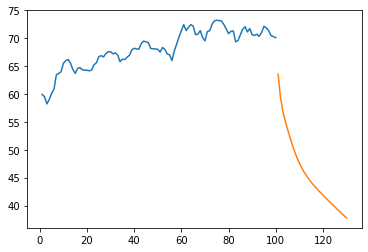

In [39]:
plt.plot(day_new, sc.inverse_transform(df[3170:]))
plt.plot(day_pred, sc.inverse_transform(lst_output))